# PIC 194
This notebook shows how to proceed to transform Supervisely bitmap labels into Numpy arrays.              




### Import libraries

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import base64
import zlib
import typing

### Read annotation file

Pick necessary information from Supervisely .json file:
- Supervisely bitmap
- Image size

In [43]:
with open('data_example/TH_16_09_24_mask.jpg.json', 'r') as f:
  data = json.load(f)
f.close()

for label in data["objects"]:
  bitmap = label["bitmap"]
  print(bitmap)

{'data': 'eJwkWXc4XN/TVxarW6utbpfVOyFKtLV6ryHReyd6SHSL1QXRewRRgiC6rE6i957oXbQU8fr+3j/uc+6Z8pm5c+acM/PcOF1tFVIieiIsLCxSNVWEPhYWiczDY46N+0BZCEJbPQz4upqGyg/j/f19+WLh6sMbtq++tgGW/M6CAxbWNzo1hIJhYN5xZ3vaMV89vJVnhMvzR9LsGAy9OIARSp5xYOAky8umLV2PUunhKy2paplT3kojJMQh5D+H3HdryK89EVHI4lj1cMT78yf2tPQDXWvcW9T6f+P5W1Thw3j7u12JxX1wu5cFgc6QpNeBDkC9xTBDKIEeZhn03eFkoHGFXk7SwDqxCoOPdwg/IrtUq+3RrSLG9AM5HgPiMlwcNuASyj4XFSZRHzLRSN6qDDDMxSxoHuOmDqG65dpa1LIw85ZolHPN5steC2hfyk/vkhbaCidkfcPbJWJtZOBNzJNB7ptXXnG3MctI7aZYDQz5yiOUE/kJRbgdxrQ298vT6lAo/MetfGjrm2FeLddP6KUZeksB0IAzlesX4bnnwIapy2gRMV2mhilMfUz4b5Q9htVGLuRvkK7qsumHZZuLuFvkEhLZhJdA0YsP+sOWCQrJqLg72wZb11d4e6xSKTj/7s1BurvEqyK96rYlYXVYIYm3l+aX4Q5dcl7QiEy9XDNoJKrBrAWgtHs3hJIF1cweujCJJaKdUFZLdefMkAZOKKT3LuYBi0IS1Hvit8LgQtghhs1f+qgZtwAkP/rgBBsvDB90LITaA0SitHt8UHQJfqJYvD52Dcx/5h2wKkLZYQ8O4DstyekUhZeIi5RAWKHMEmFh4EMFhLT81a5e2FlmOD6WaF8RfyTKeGgMdT5689/QoNqk6IF8iAcQBpNS2Ln2k1maISoV88N5om5AC3wl0KT9MhuVCnKneC9XKnYcN9TE8uAsEukbMRQvQ3MoKyxSAkaj/+eTkLoBJx1kkhA6zezmvTYjrE

In [44]:
data["size"]

{'height': 3456, 'width': 5184}

### Transform Supervisely bitmaps to Numpy arrays

In [45]:
# according to Supervisely documentation -> https://developer.supervisely.com/getting-started/supervisely-annotation-format/objects#bitmap
def base64_2_mask(s: str) -> np.array:
    """
    This function takes a base64 encoded (encoded bitmap from Supervisely) and converts it to a binary numpy array
    :param s: the base64 encoded
    :return: a binary numpy array
    """
    z = zlib.decompress(base64.b64decode(s))
    n = np.fromstring(z, np.uint8)
    mask = cv2.imdecode(n, cv2.IMREAD_UNCHANGED)[:, :, 3].astype(bool)
    return mask

def bitmap_to_array(bitmap: typing.Dict, img_size: typing.Tuple[int, int]) -> np.ndarray:
    """
    This function takes a bitmap dictionary from Supervisely .json annotation file + the associated image size and returns a binary numpy array. 
    It enables to do the offset of the bitmap depending on the origin of the bitmap on the full-size mask.
    :param bitmap: Supervisely dictionary bitmap
    :param img_size: tuple of image size (-> height, width)
    :return: full-size mask
    """
    mask = np.zeros(img_size, np.uint8)
    stamp = base64_2_mask(s=bitmap["data"])
    origin_x, origin_y = bitmap["origin"]
    mask[origin_y: origin_y + stamp.shape[0],
       origin_x : origin_x + stamp.shape[1]] = stamp
    return mask

C:\Users\tristan_cotte\AppData\Local\Temp\ipykernel_13644\299156426.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  n = np.fromstring(z, np.uint8)


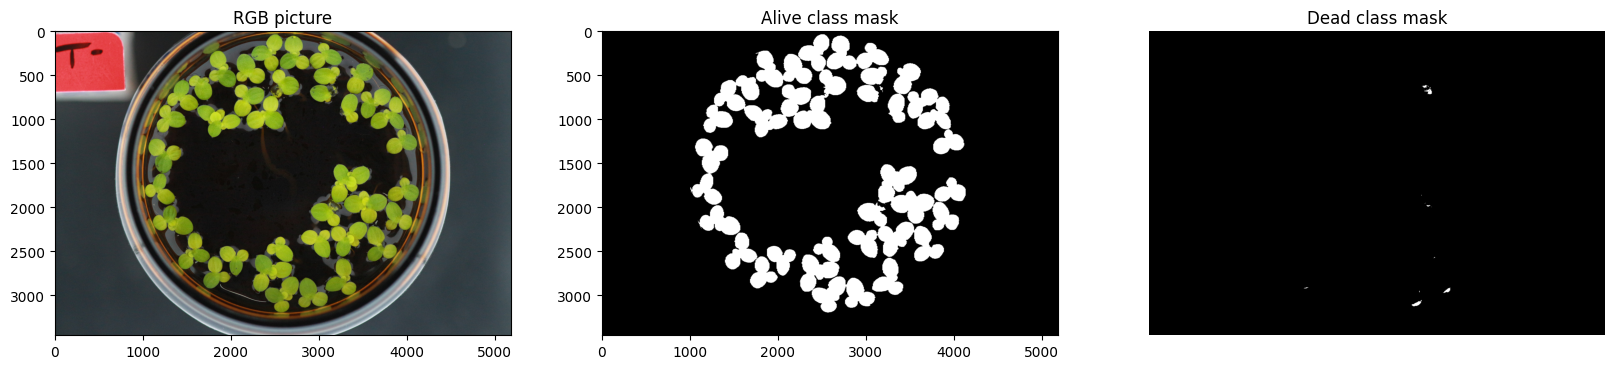

In [46]:
f, axs = plt.subplots(1, 3, figsize=(20, 20))
rgb_img = cv2.cvtColor(cv2.imread("data_example/TH_16_09_24.jpg"), cv2.COLOR_BGR2RGB)
axs[0].imshow(rgb_img)

# loop on all labels in the .json file
for index, label in enumerate(data["objects"]):
  bitmap = label["bitmap"]
  # function to compute the numpy arrays
  axs[index + 1].imshow(bitmap_to_array(bitmap=bitmap, img_size=(data["size"]["height"], data["size"]["width"])), cmap="gray")

axs[0].set_title("RGB picture")
axs[1].set_title("Alive class mask")
axs[2].set_title("Dead class mask")

plt.axis('off')
plt.show()